In [1]:
%matplotlib tk
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import glob, os
import io
import seaborn as sns
import matplotlib.ticker as plticker
warnings.simplefilter("ignore")
from matplotlib.legend import _get_legend_handles_labels
#from treelib import Node, Tree
import pygraphviz as pgv
import graphviz

In [2]:
clusters=3
exsteps=20
expansionsteps = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55]

In [3]:
#5000

In [4]:
filename = list()
fclust=list()
stepsize1="5000"
stepsize2="expand_long00"
stepsize3="expand_long03"
subplotsname= list()
controllist5000=list()
seed=0
runs=0
nr=0

for runs in range(exsteps): # could be also lower/higher - if for one is no expansion possible
    run= str(runs)
    
    for cluster in range(clusters): #collect for each expansion step/cluster
        cl=str(cluster)

        dfname1_sum=str("dfcluster"+cl+"round"+run+"sum") 

        subplotsname.append(dfname1_sum)
        
        if runs == 0:
            for nr in range(10): #10 different pdbs as starting points      
                n=str(nr+1)
                filename1=str(stepsize1+"/cluster"+cl+"/"+run+"/"+n+"/CopStemsc"+cl+"_"+stepsize3+"_"+run+"_"+n+".csv")
                #first st = constraint, second st = start, +100 cut
                dfname1= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,103)])
                dfname1['constraint'] = int(expansionsteps[runs])
                dfname1['expansionstep'] = int(runs)
                dfname1['run'] = int(nr+1)
                dfname1['cluster'] = int(cluster)
                dfname1['seed'] = int(nr+1)
                fclust.append(dfname1)
                controllist5000.append([filename1,int(expansionsteps[runs]),int(cluster),int(runs),int(nr+1),int(nr+1)])

        else:
            for nr in range(10): #10 different pdbs as starting points      
                n=str(nr+1)
                #summerized file from continous search
                #filename2=str(stepsize1+"/cluster"+cl+"/"+run+"/"+n+"/CopStemsc"+cl+"_"+stepsize2+"_"+run+".interaction-csv")
                #dfname2=str("dfcluster"+cl+"round"+run+"nr"+n+"_interaction")

                for seed in range (10): #10 different seeds per pdb
                    #each single file
                    seed= str(seed+1)
                    filename1=str(stepsize1+"/cluster"+cl+"/"+run+"/"+n+"/CopStemsc"+cl+"_"+stepsize2+"_"+run+"_"+seed+".csv")

                    try:
                        dfname1= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,103)])
                        dfname1['constraint'] = int(expansionsteps[runs])
                        dfname1['expansionstep'] = int(runs)
                        dfname1['run'] = int(nr+1)
                        dfname1['cluster'] = int(cluster)
                        dfname1['seed'] = seed
                        fclust.append(dfname1)
                        controllist5000.append([filename1,int(expansionsteps[runs]),int(cluster),int(runs),int(nr+1),seed])

                    except:
                        #print("Probably there were no further expansion possible - please check")
                        #print(filename1)
                        pass
                
print("controllist")    
for item in controllist5000:
    print(item)    

print (len(fclust)) 
df_5000_expand_long00 = pd.concat(fclust) 
    
print(len(df_5000_expand_long00))
print(df_5000_expand_long00)

controllist
['5000/cluster0/0/1/CopStemsc0_expand_long03_0_1.csv', 3, 0, 0, 1, 1]
['5000/cluster0/0/2/CopStemsc0_expand_long03_0_2.csv', 3, 0, 0, 2, 2]
['5000/cluster0/0/3/CopStemsc0_expand_long03_0_3.csv', 3, 0, 0, 3, 3]
['5000/cluster0/0/4/CopStemsc0_expand_long03_0_4.csv', 3, 0, 0, 4, 4]
['5000/cluster0/0/5/CopStemsc0_expand_long03_0_5.csv', 3, 0, 0, 5, 5]
['5000/cluster0/0/6/CopStemsc0_expand_long03_0_6.csv', 3, 0, 0, 6, 6]
['5000/cluster0/0/7/CopStemsc0_expand_long03_0_7.csv', 3, 0, 0, 7, 7]
['5000/cluster0/0/8/CopStemsc0_expand_long03_0_8.csv', 3, 0, 0, 8, 8]
['5000/cluster0/0/9/CopStemsc0_expand_long03_0_9.csv', 3, 0, 0, 9, 9]
['5000/cluster0/0/10/CopStemsc0_expand_long03_0_10.csv', 3, 0, 0, 10, 10]
['5000/cluster1/0/1/CopStemsc1_expand_long03_0_1.csv', 3, 1, 0, 1, 1]
['5000/cluster1/0/2/CopStemsc1_expand_long03_0_2.csv', 3, 1, 0, 2, 2]
['5000/cluster1/0/3/CopStemsc1_expand_long03_0_3.csv', 3, 1, 0, 3, 3]
['5000/cluster1/0/4/CopStemsc1_expand_long03_0_4.csv', 3, 1, 0, 4, 4]
['50

3751790
                                                 number  \
0     CopStemsc0_expand_long03_0_1_1-000101.ss_detected   
1     CopStemsc0_expand_long03_0_1_1-000102.ss_detected   
2     CopStemsc0_expand_long03_0_1_1-000103.ss_detected   
3     CopStemsc0_expand_long03_0_1_1-000104.ss_detected   
4     CopStemsc0_expand_long03_0_1_1-000105.ss_detected   
...                                                 ...   
4896  CopStemsc2_expand_long00_4_10_10-004997.ss_det...   
4897  CopStemsc2_expand_long00_4_10_10-004998.ss_det...   
4898  CopStemsc2_expand_long00_4_10_10-004999.ss_det...   
4899  CopStemsc2_expand_long00_4_10_10-005000.ss_det...   
4900  CopStemsc2_expand_long00_4_10_10-005001.ss_det...   

                                               sequence  count_constraint  \
0      ((((((((((((((((((((.(((......))))))).)))))))...                 4   
1      ((((((((((((((((((((.(((......))))))).)))))))...                 2   
2      ..((((((((((((((((((.(((......)))))).))))))))

0 3
   interaction_length     nr    percent  constraint
0                   1    127   0.469848           3
1                   6    666   2.463929           3
2                   2   1943   7.188309           3
3                   5   3575  13.226045           3
4                   3  10090  37.328894           3
5                   4  10629  39.322974           3
counted structures 27030
1 5
   interaction_length      nr    percent  constraint
0                   0      59   0.004013           5
1                   6    2499   0.169965           5
2                   1    8979   0.610692           5
3                   2   87463   5.948650           5
4                   5  154541  10.510848           5
5                   4  526100  35.781813           5
6                   3  690659  46.974019           5
counted structures 1470300
2 7
   interaction_length      nr    percent  constraint
0                   1     858   0.076116           7
1                   2   18256   1.619545  

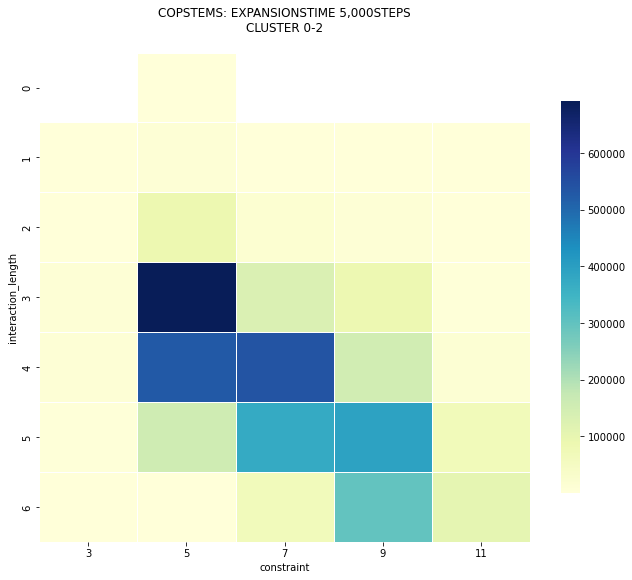

In [6]:
fheatmap = list()
constraint=list()

for run in range(exsteps):
    print(run,expansionsteps[run] )
    new1_df = df_5000_expand_long00[(df_5000_expand_long00["constraint"] == expansionsteps[run])]
    
    values1 = pd.DataFrame(new1_df.len_interaction.value_counts().sort_values().reset_index())
                         
    values1.columns = ['interaction_length', 'nr']
    values1['percent'] = (values1.nr /values1.nr.sum())*100
    values1['constraint'] = expansionsteps[run]
    print(values1)
    print("counted structures {}".format(values1['nr'].sum()))
    fheatmap.append(values1)

dfheatmap = pd.concat(fheatmap)

dfheat = pd.pivot_table(dfheatmap,index='interaction_length',columns='constraint',values='nr', aggfunc=np.sum)
print(dfheat)

fig, ax = plt.subplots(figsize=[11,9])
fig.patch.set_facecolor('white')

title = 'CopStems: Expansionstime 5,000steps\nCluster 0-2\n'.upper()
plt.title(title, loc='center')

sns.heatmap(dfheat, cmap="YlGnBu",linewidth=1, cbar_kws={"shrink":0.8})


plt.savefig('df_5000_expand_long00_all3clusters.png')
plt.show()

0 3
   interaction_countbp     nr    percent  constraint
0                    1    127   0.469848           3
1                    6    666   2.463929           3
2                    2   1943   7.188309           3
3                    5   3575  13.226045           3
4                    3  10090  37.328894           3
5                    4  10629  39.322974           3
counted structures 27030
1 5
   interaction_countbp      nr    percent  constraint
0                    0      59   0.004013           5
1                    6    2499   0.169965           5
2                    1    8979   0.610692           5
3                    2   87463   5.948650           5
4                    5  154541  10.510848           5
5                    4  526100  35.781813           5
6                    3  690659  46.974019           5
counted structures 1470300
2 7
   interaction_countbp      nr    percent  constraint
0                    1     858   0.076116           7
1                    2   

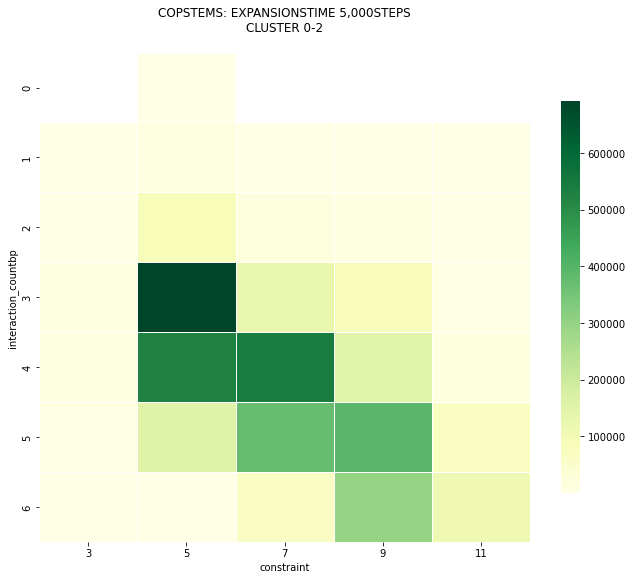

In [14]:
fheatmap = list()
constraint=list()

for run in range(exsteps):
    print(run,expansionsteps[run] )
    new1_df = df_5000_expand_long00[(df_5000_expand_long00["constraint"] == expansionsteps[run])]
    
    values1 = pd.DataFrame(new1_df.len_interaction.value_counts().sort_values().reset_index())
                         
    values1.columns = ['interaction_countbp', 'nr']
    values1['percent'] = (values1.nr /values1.nr.sum())*100
    values1['constraint'] = expansionsteps[run]
    print(values1)
    print("counted structures {}".format(values1['nr'].sum()))
    fheatmap.append(values1)

dfheatmap = pd.concat(fheatmap)

dfheat = pd.pivot_table(dfheatmap,index='interaction_countbp',columns='constraint',values='nr', aggfunc=np.sum)
print(dfheat)

fig, ax = plt.subplots(figsize=[11,9])
fig.patch.set_facecolor('white')

title = 'CopStems: Expansionstime 5,000steps\nCluster 0-2\n'.upper()
plt.title(title, loc='center')

sns.heatmap(dfheat, cmap = 'YlGn', linewidth=1, cbar_kws={"shrink":0.8})


plt.savefig('df_5000_expand_long00_all3clusters_inclbulges.png')
plt.show()

cluster 0
counted structures 9010
counted structures 490100
counted structures 490100
counted structures 490100
counted structures 49010
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
constraint              3         5         7         9        11
interaction_length                                               
1                      6.0    1588.0     471.0     185.0      NaN
2                     98.0   13704.0    7819.0    5339.0    127.0
3                   1168.0  147633.0   59741.0   65716.0    942.0
4                   4018.0  236467.0  180689.0   52589.0   2641.0
5                   3054.0   88209.0  179525.0  122905.0  14732.0
6                    666.0    2499.0   61855.0  243366.0  30568.0
cluster 1
counted st

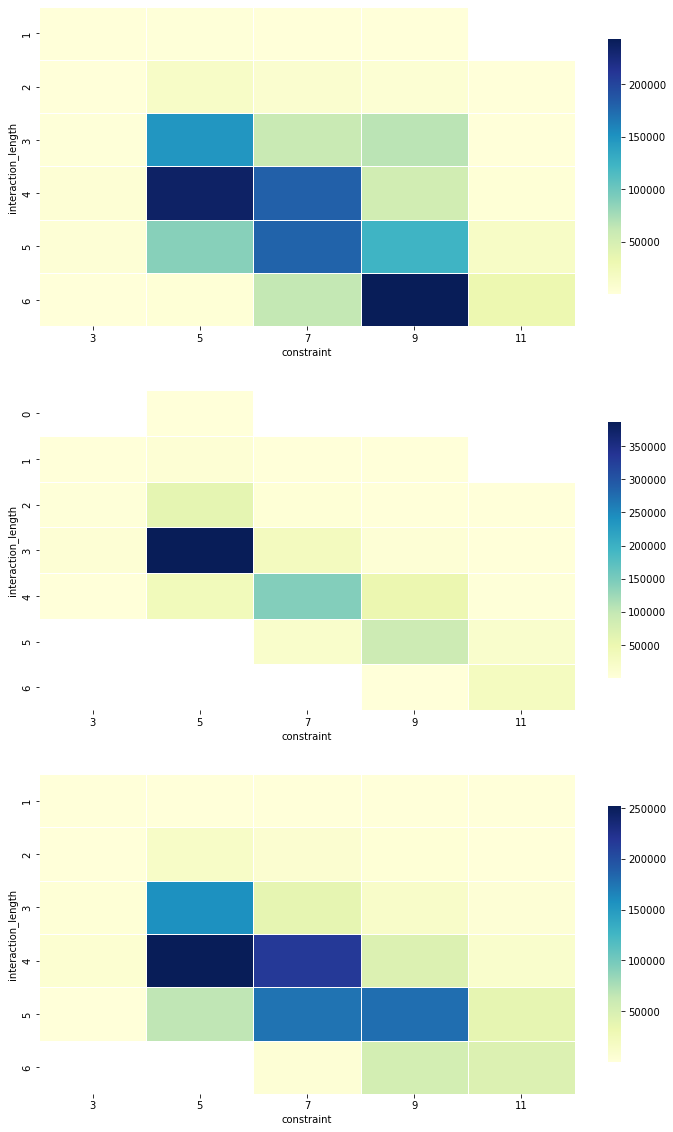

In [7]:
fheatmap = list()
constraint=list()

fig, ax = plt.subplots(nrows=3,figsize=[12,20])
fig.patch.set_facecolor('white')
#plot=0

for cl in range(clusters):
    print('cluster {}'.format(cl))
    currentconstraint = expansionsteps[cl]
    
    new1_df = df_5000_expand_long00[(df_5000_expand_long00["cluster"] == cl)]
      
    for runs in range(exsteps):
        new2_df = new1_df[(new1_df["constraint"] == expansionsteps[runs])]
        values1 = pd.DataFrame(new2_df.len_interaction.value_counts().sort_values().reset_index())
        values1.columns = ['interaction_length', 'nr']
        values1['percent'] = (values1.nr /values1.nr.sum())*100
        values1['constraint'] = expansionsteps[runs] 
        print("counted structures {}".format(values1['nr'].sum()))
        fheatmap.append(values1)

      
    dfheatmap = pd.concat(fheatmap)

    dfheatabs = pd.pivot_table(dfheatmap,index='interaction_length',columns='constraint',values='nr', aggfunc=np.sum)
    print(dfheatabs)

    
    #dfheatper = pd.pivot_table(dfheatmap,index='interaction_length',columns='constraint',values='percent', aggfunc=np.sum)
    #print(dfheatper)
    
    axname = str('ax'+str(cl+1))
    axname = sns.heatmap(dfheatabs, cmap="YlGnBu",linewidth=1, cbar_kws={"shrink":0.8}, ax=ax[cl])
    #axname = sns.heatmap(dfheatabs, cmap="YlGnBu",linewidth=1, cbar_kws={"shrink":0.8}, ax=ax[plot])
    #axname = sns.heatmap(dfheatper, cmap="YlGnBu",linewidth=1, cbar_kws={"shrink":0.8}, ax=ax[plot+1])
    #plot+=2
    fheatmap.clear()
    
plt.savefig('df_5000_expand_long00_allclustersseperat.png')
plt.show()

In [ ]:
'''
--- > ideen fuer Energy?

heat map ist der Durchschnitt
violin plots = zu viel plots?
per constraint
energy


        bps

'''

In [10]:
controllist5000.sort(key=lambda k: (k[2], k[3], k[4], k[5]))
dotfile = list()
dotfile.append("digraph dotfile {")
dotfile.append("rankdir=LR")
count = 0

for line in controllist5000: 

    if count == 0:
        start="ErnwinStart"     
        c,e,r,s = line[2],line[3],line[4],line[5]
        cluster = "CLUSTER_"+str(c)
        expansion = "c_"+str(c)+"RELAX_100000_"+str(e)
        run = "c_"+str(c)+"e_"+str(e)+"RUN_"+str(r)+"seed"+str(r)
        dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
        dotfile.append(cluster+" [style=diagonals]")
        dotfile.append(start+" -> "+cluster)
        dotfile.append(cluster+" -> "+expansion)
        dotfile.append(expansion+" -> "+run)
        dotfile.append(run+" -> "+seed)
        count += 1

    else:
        if line[2] != c:
            c = line[2]
            cluster = "CLUSTER_"+str(c)
            dotfile.append(cluster+" [style=diagonals]")
            dotfile.append(start+" -> "+cluster)
          
        e = line[3]

        if line[4] != r: #because several seed per run

            if (e == 0):
                
                expansion = "c_"+str(c)+"RELAX_100000_"+str(e)
                if (cluster+" -> "+expansion not in dotfile):
                    dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
                    dotfile.append(cluster+" -> "+expansion)
                
            else:
                expansion = "c_"+str(c)+"EXPANSION_"+str(e)+"run_"+str(r)
                if (seed+" -> "+expansion not in dotfile):
                    dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
                    if (e == 1):
                        run = "c_"+str(c)+"e_"+str(e-1)+"RUN_"+str(r)+"seed"+str(r)
                        dotfile.append(run+" -> "+expansion)
                    else:
                        seed = "c_"+str(c)+"e_"+str(e-1)+"r_"+str(line[4])+"seed1to10"
                        dotfile.append(seed+" -> "+expansion)
                
        if line[4] != r:
            if (e == 0):
                r = line[4]
                run = "c_"+str(c)+"e_"+str(e)+"RUN_"+str(r)+"seed"+str(r)
                dotfile.append(expansion+" -> "+run)
                
            else:    
                r = line[4]
                run = "c_"+str(c)+"e_"+str(e)+"RUN_"+str(r)
                seed = "c_"+str(c)+"e_"+str(e)+"r_"+str(r)+"seed1to10"
                dotfile.append(expansion+" -> "+run)

                dotfile.append(run+" -> "+seed)
    
dotfile.append("}")  

with open('dotfile'+stepsize1+'.dot', 'w') as f:
    for item in dotfile:
        f.write("%s\n" % item)
        
#with open("dotfile.dot") as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

#dot dotfile.dot -Tpng -o dotfile.png

In [9]:
#10-000

In [16]:
filename = list()
fclust=list()
stepsize1="10-000"
stepsize2="expand"
stepsize3="expand_long03"
subplotsname= list()
controllist10000=list()
seed=0
runs=0
nr=0

for runs in range(exsteps): # could be also lower/higher - if for one is no expansion possible
    run= str(runs)
    
    for cluster in range(clusters): #collect for each expansion step/cluster
        cl=str(cluster)

        dfname1_sum=str("dfcluster"+cl+"round"+run+"sum") 

        subplotsname.append(dfname1_sum)
        
        if runs == 0:
            for nr in range(10): #10 different pdbs as starting points      
                n=str(nr+1)
                filename1=str(stepsize1+"/cluster"+cl+"/"+run+"/"+n+"/CopStemsc"+cl+"_"+stepsize3+"_"+run+"_"+n+".csv")
                dfname1= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,103)])
                dfname1['constraint'] = int(expansionsteps[runs])
                dfname1['expansionstep'] = int(runs)
                dfname1['run'] = int(nr+1)
                dfname1['cluster'] = int(cluster)
                dfname1['seed'] = int(nr+1)
                fclust.append(dfname1)
                controllist10000.append([filename1,int(expansionsteps[runs]),int(cluster),int(runs),int(nr+1),int(nr+1)])

        else:
            for nr in range(10): #10 different pdbs as starting points      
                n=str(nr+1)
                
                for seed in range (10): #10 different seeds per pdb
                    #each single file
                    seed= str(seed+1)
                    filename1=str(stepsize1+"/cluster"+cl+"/"+run+"/"+n+"/CopStemsc"+cl+"_"+stepsize2+"_"+run+"_"+seed+".csv")

                    try:
                        dfname1= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,103)])
                        dfname1['constraint'] = int(expansionsteps[runs])
                        dfname1['expansionstep'] = int(runs)
                        dfname1['run'] = int(nr+1)
                        dfname1['cluster'] = int(cluster)
                        dfname1['seed'] = seed
                        fclust.append(dfname1)
                        controllist10000.append([filename1,int(expansionsteps[runs]),int(cluster),int(runs),int(nr+1),seed])

                    except:
                        print("Probably there were no further expansion possible - please check")
                        print(filename1)
                        pass
                
print("controllist")    
for item in controllist10000:
    print(item)    

print (len(fclust)) 
df_10000_expand_long00 = pd.concat(fclust) 
    
print(len(df_10000_expand_long00))
print(df_10000_expand_long00)

Probably there were no further expansion possible - please check
10-000/cluster1/3/1/CopStemsc1_expand_3_1.csv
Probably there were no further expansion possible - please check
10-000/cluster1/3/1/CopStemsc1_expand_3_2.csv
Probably there were no further expansion possible - please check
10-000/cluster1/3/1/CopStemsc1_expand_3_3.csv
Probably there were no further expansion possible - please check
10-000/cluster1/3/1/CopStemsc1_expand_3_4.csv
Probably there were no further expansion possible - please check
10-000/cluster1/3/1/CopStemsc1_expand_3_5.csv
Probably there were no further expansion possible - please check
10-000/cluster1/3/1/CopStemsc1_expand_3_6.csv
Probably there were no further expansion possible - please check
10-000/cluster1/3/1/CopStemsc1_expand_3_7.csv
Probably there were no further expansion possible - please check
10-000/cluster1/3/1/CopStemsc1_expand_3_8.csv
Probably there were no further expansion possible - please check
10-000/cluster1/3/1/CopStemsc1_expand_3_9.csv
P

Probably there were no further expansion possible - please check
10-000/cluster0/4/4/CopStemsc0_expand_4_1.csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/4/CopStemsc0_expand_4_2.csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/4/CopStemsc0_expand_4_3.csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/4/CopStemsc0_expand_4_4.csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/4/CopStemsc0_expand_4_5.csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/4/CopStemsc0_expand_4_6.csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/4/CopStemsc0_expand_4_7.csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/4/CopStemsc0_expand_4_8.csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/4/CopStemsc0_expand_4_9.csv
P

Probably there were no further expansion possible - please check
10-000/cluster1/4/7/CopStemsc1_expand_4_1.csv
Probably there were no further expansion possible - please check
10-000/cluster1/4/7/CopStemsc1_expand_4_2.csv
Probably there were no further expansion possible - please check
10-000/cluster1/4/7/CopStemsc1_expand_4_3.csv
Probably there were no further expansion possible - please check
10-000/cluster1/4/7/CopStemsc1_expand_4_4.csv
Probably there were no further expansion possible - please check
10-000/cluster1/4/7/CopStemsc1_expand_4_5.csv
Probably there were no further expansion possible - please check
10-000/cluster1/4/7/CopStemsc1_expand_4_6.csv
Probably there were no further expansion possible - please check
10-000/cluster1/4/7/CopStemsc1_expand_4_7.csv
Probably there were no further expansion possible - please check
10-000/cluster1/4/7/CopStemsc1_expand_4_8.csv
Probably there were no further expansion possible - please check
10-000/cluster1/4/7/CopStemsc1_expand_4_9.csv
P

Probably there were no further expansion possible - please check
10-000/cluster0/5/2/CopStemsc0_expand_5_6.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/2/CopStemsc0_expand_5_7.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/2/CopStemsc0_expand_5_8.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/2/CopStemsc0_expand_5_9.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/2/CopStemsc0_expand_5_10.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/3/CopStemsc0_expand_5_1.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/3/CopStemsc0_expand_5_2.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/3/CopStemsc0_expand_5_3.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/3/CopStemsc0_expand_5_4.csv


Probably there were no further expansion possible - please check
10-000/cluster0/5/10/CopStemsc0_expand_5_1.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/10/CopStemsc0_expand_5_2.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/10/CopStemsc0_expand_5_3.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/10/CopStemsc0_expand_5_4.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/10/CopStemsc0_expand_5_5.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/10/CopStemsc0_expand_5_6.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/10/CopStemsc0_expand_5_7.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/10/CopStemsc0_expand_5_8.csv
Probably there were no further expansion possible - please check
10-000/cluster0/5/10/CopStemsc0_expand_

Probably there were no further expansion possible - please check
10-000/cluster1/5/9/CopStemsc1_expand_5_1.csv
Probably there were no further expansion possible - please check
10-000/cluster1/5/9/CopStemsc1_expand_5_2.csv
Probably there were no further expansion possible - please check
10-000/cluster1/5/9/CopStemsc1_expand_5_3.csv
Probably there were no further expansion possible - please check
10-000/cluster1/5/9/CopStemsc1_expand_5_4.csv
Probably there were no further expansion possible - please check
10-000/cluster1/5/9/CopStemsc1_expand_5_5.csv
Probably there were no further expansion possible - please check
10-000/cluster1/5/9/CopStemsc1_expand_5_6.csv
Probably there were no further expansion possible - please check
10-000/cluster1/5/9/CopStemsc1_expand_5_7.csv
Probably there were no further expansion possible - please check
10-000/cluster1/5/9/CopStemsc1_expand_5_8.csv
Probably there were no further expansion possible - please check
10-000/cluster1/5/9/CopStemsc1_expand_5_9.csv
P

Probably there were no further expansion possible - please check
10-000/cluster0/8/5/CopStemsc0_expand_8_10.csv
Probably there were no further expansion possible - please check
10-000/cluster0/8/6/CopStemsc0_expand_8_1.csv
Probably there were no further expansion possible - please check
10-000/cluster0/8/6/CopStemsc0_expand_8_2.csv
Probably there were no further expansion possible - please check
10-000/cluster0/8/6/CopStemsc0_expand_8_3.csv
Probably there were no further expansion possible - please check
10-000/cluster0/8/6/CopStemsc0_expand_8_4.csv
Probably there were no further expansion possible - please check
10-000/cluster0/8/6/CopStemsc0_expand_8_5.csv
Probably there were no further expansion possible - please check
10-000/cluster0/8/6/CopStemsc0_expand_8_6.csv
Probably there were no further expansion possible - please check
10-000/cluster0/8/6/CopStemsc0_expand_8_7.csv
Probably there were no further expansion possible - please check
10-000/cluster0/8/6/CopStemsc0_expand_8_8.csv


Probably there were no further expansion possible - please check
10-000/cluster1/11/6/CopStemsc1_expand_11_4.csv
Probably there were no further expansion possible - please check
10-000/cluster1/11/6/CopStemsc1_expand_11_5.csv
Probably there were no further expansion possible - please check
10-000/cluster1/11/6/CopStemsc1_expand_11_6.csv
Probably there were no further expansion possible - please check
10-000/cluster1/11/6/CopStemsc1_expand_11_7.csv
Probably there were no further expansion possible - please check
10-000/cluster1/11/6/CopStemsc1_expand_11_8.csv
Probably there were no further expansion possible - please check
10-000/cluster1/11/6/CopStemsc1_expand_11_9.csv
Probably there were no further expansion possible - please check
10-000/cluster1/11/6/CopStemsc1_expand_11_10.csv
Probably there were no further expansion possible - please check
10-000/cluster1/11/7/CopStemsc1_expand_11_1.csv
Probably there were no further expansion possible - please check
10-000/cluster1/11/7/CopStemsc

Probably there were no further expansion possible - please check
10-000/cluster0/15/2/CopStemsc0_expand_15_2.csv
Probably there were no further expansion possible - please check
10-000/cluster0/15/2/CopStemsc0_expand_15_3.csv
Probably there were no further expansion possible - please check
10-000/cluster0/15/2/CopStemsc0_expand_15_4.csv
Probably there were no further expansion possible - please check
10-000/cluster0/15/2/CopStemsc0_expand_15_5.csv
Probably there were no further expansion possible - please check
10-000/cluster0/15/2/CopStemsc0_expand_15_6.csv
Probably there were no further expansion possible - please check
10-000/cluster0/15/2/CopStemsc0_expand_15_7.csv
Probably there were no further expansion possible - please check
10-000/cluster0/15/2/CopStemsc0_expand_15_8.csv
Probably there were no further expansion possible - please check
10-000/cluster0/15/2/CopStemsc0_expand_15_9.csv
Probably there were no further expansion possible - please check
10-000/cluster0/15/2/CopStemsc0

Probably there were no further expansion possible - please check
10-000/cluster1/18/1/CopStemsc1_expand_18_4.csv
Probably there were no further expansion possible - please check
10-000/cluster1/18/1/CopStemsc1_expand_18_5.csv
Probably there were no further expansion possible - please check
10-000/cluster1/18/1/CopStemsc1_expand_18_6.csv
Probably there were no further expansion possible - please check
10-000/cluster1/18/1/CopStemsc1_expand_18_7.csv
Probably there were no further expansion possible - please check
10-000/cluster1/18/1/CopStemsc1_expand_18_8.csv
Probably there were no further expansion possible - please check
10-000/cluster1/18/1/CopStemsc1_expand_18_9.csv
Probably there were no further expansion possible - please check
10-000/cluster1/18/1/CopStemsc1_expand_18_10.csv
Probably there were no further expansion possible - please check
10-000/cluster1/18/2/CopStemsc1_expand_18_1.csv
Probably there were no further expansion possible - please check
10-000/cluster1/18/2/CopStemsc

9234960
                                                 number  \
0     CopStemsc0_expand_long03_0_1_1-000101.ss_detected   
1     CopStemsc0_expand_long03_0_1_1-000102.ss_detected   
2     CopStemsc0_expand_long03_0_1_1-000103.ss_detected   
3     CopStemsc0_expand_long03_0_1_1-000104.ss_detected   
4     CopStemsc0_expand_long03_0_1_1-000105.ss_detected   
...                                                 ...   
9896       CopStemsc1_expand_5_10_10-009997.ss_detected   
9897       CopStemsc1_expand_5_10_10-009998.ss_detected   
9898       CopStemsc1_expand_5_10_10-009999.ss_detected   
9899       CopStemsc1_expand_5_10_10-010000.ss_detected   
9900       CopStemsc1_expand_5_10_10-010001.ss_detected   

                                               sequence  count_constraint  \
0      ((((((((((((((((((((.(((......))))))).)))))))...                 4   
1      ((((((((((((((((((((.(((......))))))).)))))))...                 2   
2      ..((((((((((((((((((.(((......)))))).))))))))

   interaction_length     nr    percent  constraint
0                   1    127   0.469848           3
1                   6    666   2.463929           3
2                   2   1943   7.188309           3
3                   5   3575  13.226045           3
4                   3  10090  37.328894           3
5                   4  10629  39.322974           3
counted structures 27030
   interaction_length       nr    percent  constraint
0                   0      706   0.023769           5
1                   1    16014   0.539137           5
2                   6    20932   0.704710           5
3                   2   166964   5.621116           5
4                   5   448816  15.110124           5
5                   4  1153364  38.829883           5
6                   3  1163504  39.171262           5
counted structures 2970300
   interaction_length       nr    percent  constraint
0                   0       19   0.000640           7
1                   1     3139   0.105680   

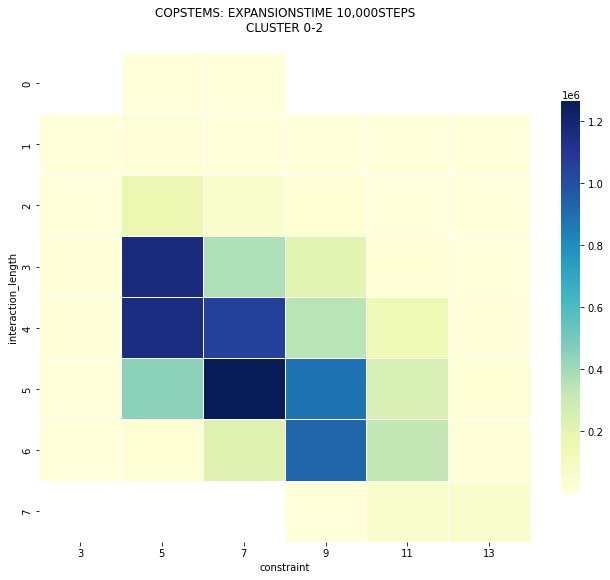

In [11]:
fheatmap = list()
constraint=list()

for run in range(exsteps):
    new1_df = df_10000_expand_long00[(df_10000_expand_long00["constraint"] == expansionsteps[run])]
    
    values1 = pd.DataFrame(new1_df.len_interaction.value_counts().sort_values().reset_index())
                         
    values1.columns = ['interaction_length', 'nr']
    values1['percent'] = (values1.nr /values1.nr.sum())*100
    values1['constraint'] = expansionsteps[run]
    print(values1)
    print("counted structures {}".format(values1['nr'].sum()))
    fheatmap.append(values1)

dfheatmap = pd.concat(fheatmap)

dfheat = pd.pivot_table(dfheatmap,index='interaction_length',columns='constraint',values='nr', aggfunc=np.sum)
print(dfheat)

fig, ax = plt.subplots(figsize=[11,9])
fig.patch.set_facecolor('white')

title = 'CopStems: Expansionstime 10,000steps\nCluster 0-2\n'.upper()
plt.title(title, loc='center')

sns.heatmap(dfheat, cmap="YlGnBu",linewidth=1, cbar_kws={"shrink":0.8})


plt.savefig('df_10000_expand_long00_all3clusters.png')
plt.show()

   interaction_countbp     nr    percent  constraint
0                    1    127   0.469848           3
1                    6    666   2.463929           3
2                    2   1943   7.188309           3
3                    5   3575  13.226045           3
4                    3  10090  37.328894           3
5                    4  10629  39.322974           3
counted structures 27030
   interaction_countbp       nr    percent  constraint
0                    0      706   0.023769           5
1                    1    16014   0.539137           5
2                    6    20932   0.704710           5
3                    2   166964   5.621116           5
4                    5   448816  15.110124           5
5                    4  1153364  38.829883           5
6                    3  1163504  39.171262           5
counted structures 2970300
   interaction_countbp       nr    percent  constraint
0                    0       19   0.000640           7
1                    1     

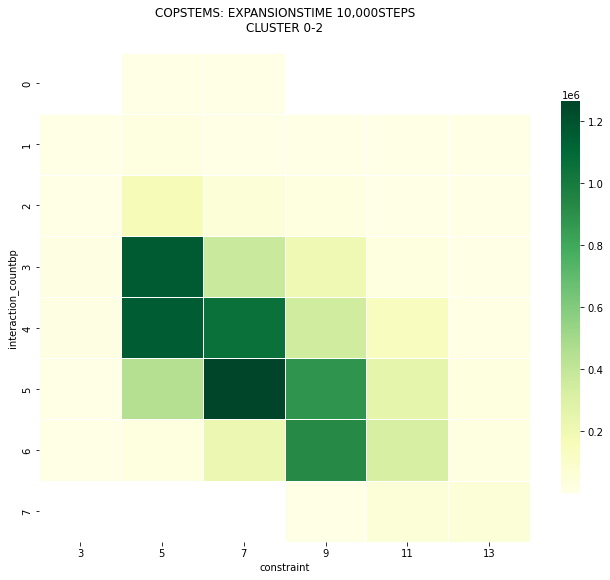

In [19]:
fheatmap = list()
constraint=list()

for run in range(exsteps):
    new1_df = df_10000_expand_long00[(df_10000_expand_long00["constraint"] == expansionsteps[run])]
    
    values1 = pd.DataFrame(new1_df.len_interaction.value_counts().sort_values().reset_index())
                         
    values1.columns = ['interaction_countbp', 'nr']
    values1['percent'] = (values1.nr /values1.nr.sum())*100
    values1['constraint'] = expansionsteps[run]
    print(values1)
    print("counted structures {}".format(values1['nr'].sum()))
    fheatmap.append(values1)

dfheatmap = pd.concat(fheatmap)

dfheat = pd.pivot_table(dfheatmap,index='interaction_countbp',columns='constraint',values='nr', aggfunc=np.sum)
print(dfheat)

fig, ax = plt.subplots(figsize=[11,9])
fig.patch.set_facecolor('white')

title = 'CopStems: Expansionstime 10,000steps\nCluster 0-2\n'.upper()
plt.title(title, loc='center')

sns.heatmap(dfheat, cmap="YlGn",linewidth=1, cbar_kws={"shrink":0.8})


plt.savefig('df_10000_expand_long00_all3clustersinclbulges.png')
plt.show()


cluster 0
counted structures 9010
counted structures 990100
counted structures 990100
counted structures 990100
counted structures 198020
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
constraint              3         5         7         9        11
interaction_length                                               
0                      NaN       7.0       NaN       NaN      NaN
1                      6.0    2122.0     484.0     112.0     25.0
2                     98.0   24281.0   11737.0    5424.0    979.0
3                   1168.0  235391.0  119960.0   58687.0   5816.0
4                   4018.0  456098.0  192450.0   81638.0  33611.0
5                   3054.0  251269.0  486098.0  258781.0  91457.0
6                  

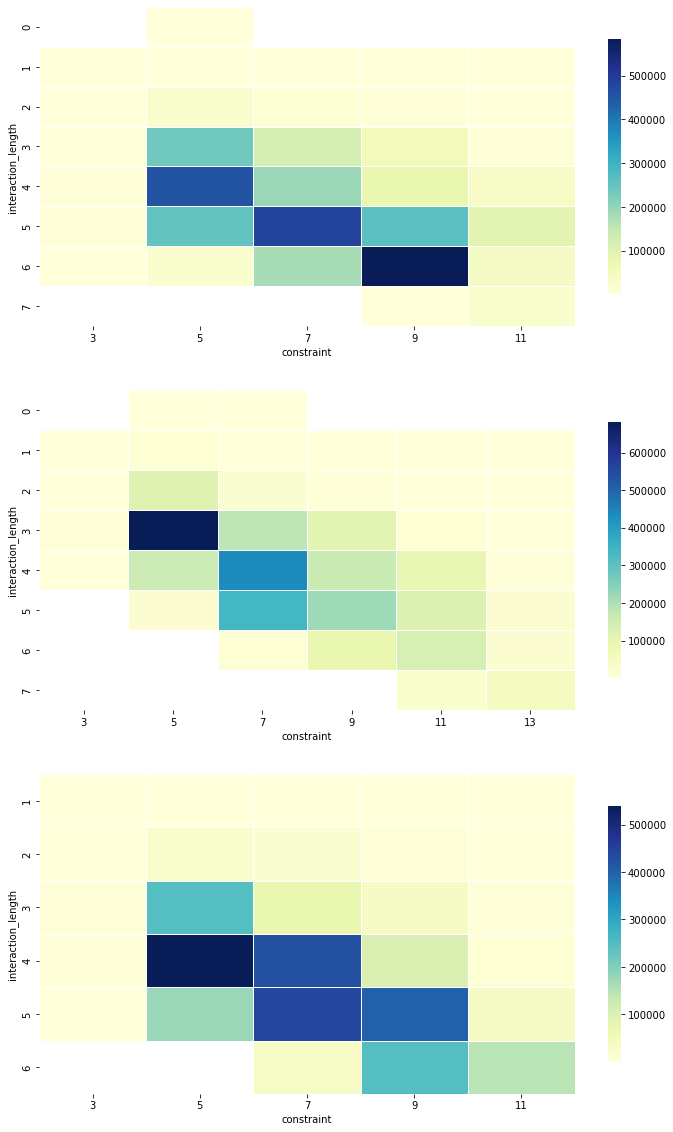

In [12]:
fheatmap = list()
constraint=list()

fig, ax = plt.subplots(nrows=3,figsize=[12,20])
fig.patch.set_facecolor('white')

for cl in range(clusters):
    print('cluster {}'.format(cl))
    currentconstraint = expansionsteps[cl]
    
    new1_df = df_10000_expand_long00[(df_10000_expand_long00["cluster"] == cl)]
      
    for runs in range(exsteps):
        new2_df = new1_df[(new1_df["constraint"] == expansionsteps[runs])]
        values1 = pd.DataFrame(new2_df.len_interaction.value_counts().sort_values().reset_index())
        values1.columns = ['interaction_length', 'nr']
        values1['percent'] = (values1.nr /values1.nr.sum())*100
        values1['constraint'] = expansionsteps[runs] 
        print("counted structures {}".format(values1['nr'].sum()))
        fheatmap.append(values1)
      
    dfheatmap = pd.concat(fheatmap)

    dfheatabs = pd.pivot_table(dfheatmap,index='interaction_length',columns='constraint',values='nr', aggfunc=np.sum)
    print(dfheatabs)

    axname = str('ax'+str(cl+1))
    axname = sns.heatmap(dfheatabs, cmap="YlGnBu",linewidth=1, cbar_kws={"shrink":0.8}, ax=ax[cl])

    fheatmap.clear()
    
plt.savefig('df_10000_expand_long00_allclustersseperat.png')
plt.show()

In [13]:
controllist10000.sort(key=lambda k: (k[2], k[3], k[4], k[5]))
dotfile = list()
dotfile.append("digraph dotfile {")
dotfile.append("rankdir=LR")
count = 0

for line in controllist10000: 

    if count == 0:
        start="ErnwinStart"     
        c,e,r,s = line[2],line[3],line[4],line[5]
        cluster = "CLUSTER_"+str(c)
        expansion = "c_"+str(c)+"RELAX_"+str(e)
        run = "c_"+str(c)+"e_"+str(e)+"RUN_"+str(r)
        seed = "c_"+str(c)+"e_"+str(e)+"r_"+str(r)+"seed1to10"
        dotfile.append(cluster+" [style=diagonals]")
        dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
        dotfile.append(start+" -> "+cluster)
        dotfile.append(cluster+" -> "+expansion)
        dotfile.append(expansion+" -> "+run)
        dotfile.append(run+" -> "+seed)
        count += 1

    else:
        if line[2] != c:
            c = line[2]
            cluster = "CLUSTER_"+str(c)
            dotfile.append(cluster+" [style=diagonals]")
            dotfile.append(start+" -> "+cluster)
          
        e = line[3]

        if line[4] != r: #because several seed per run

            if (e == 0):
                
                expansion = "c_"+str(c)+"RELAX_"+str(e)
                if (cluster+" -> "+expansion not in dotfile):
                    dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
                    dotfile.append(cluster+" -> "+expansion)
                
            else:
                expansion = "c_"+str(c)+"EXPANSION_"+str(e)+"run_"+str(r)
                seed = "c_"+str(c)+"e_"+str(e-1)+"r_"+str(line[4])+"seed1to10"
                if (seed+" -> "+expansion not in dotfile):
                    dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
                    dotfile.append(seed+" -> "+expansion)
                
        if line[4] != r:
            r = line[4]
            run = "c_"+str(c)+"e_"+str(e)+"RUN_"+str(r)
            seed = "c_"+str(c)+"e_"+str(e)+"r_"+str(r)+"seed1to10"
            dotfile.append(expansion+" -> "+run)
            
            dotfile.append(run+" -> "+seed)
    
dotfile.append("}")  

with open('dotfile'+stepsize1+'.dot', 'w') as f:
    for item in dotfile:
        f.write("%s\n" % item)


In [20]:
filename = list()
fclust=list()
stepsize1="100-000"
stepsize2="expand_long03"
stepsize3="expand_long03"
subplotsname= list()
controllist100000=list()
seed=0
runs=0
nr=0


for runs in range(exsteps): # could be also lower/higher - if for one is no expansion possible
    run= str(runs)
    
    for cluster in range(clusters): #collect for each expansion step/cluster
        cl=str(cluster)

        dfname1_sum=str("dfcluster"+cl+"round"+run+"sum") 

        subplotsname.append(dfname1_sum)
        
        if runs == 0:
            for nr in range(10): #10 different pdbs as starting points      
                n=str(nr+1)
                filename1=str(stepsize1+"/cluster"+cl+"/"+run+"/"+n+"/CopStemsc"+cl+"_"+stepsize3+"_"+run+"_"+n+".csv")
                dfname1= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,103)])
                dfname1['constraint'] = int(expansionsteps[runs])
                dfname1['expansionstep'] = int(runs)
                dfname1['run'] = int(nr+1)
                dfname1['cluster'] = int(cluster)
                dfname1['seed'] = int(nr+1)
                fclust.append(dfname1)
                controllist100000.append([filename1,int(expansionsteps[runs]),int(cluster),int(runs),int(nr+1),int(nr+1)])

        else:
            for nr in range(10): #10 different pdbs as starting points      
                n=str(nr+1)

                for seed in range (10): #10 different seeds per pdb
                    #each single file
                    seed= str(seed+1)
                    filename1=str(stepsize1+"/cluster"+cl+"/"+run+"/"+n+"/CopStemsc"+cl+"_"+stepsize2+"_"+run+"_"+seed+".csv")

                    try:
                        dfname1= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,103)])
                        dfname1['constraint'] = int(expansionsteps[runs])
                        dfname1['expansionstep'] = int(runs)
                        dfname1['run'] = int(nr+1)
                        dfname1['cluster'] = int(cluster)
                        dfname1['seed'] = seed
                        fclust.append(dfname1)
                        controllist100000.append([filename1,int(expansionsteps[runs]),int(cluster),int(runs),int(nr+1),seed])

                    except:
                        print("Probably there were no further expansion possible - please check")
                        print(filename1)
                        pass
                
print("controllist")    
for item in controllist100000:
    print(item)    

print (len(fclust)) 
df_100000_expand_long00 = pd.concat(fclust) 
    
print(len(df_100000_expand_long00))
print(df_100000_expand_long00)

Probably there were no further expansion possible - please check
100-000/cluster0/4/1/CopStemsc0_expand_long03_4_1.csv
Probably there were no further expansion possible - please check
100-000/cluster0/4/1/CopStemsc0_expand_long03_4_2.csv
Probably there were no further expansion possible - please check
100-000/cluster0/4/1/CopStemsc0_expand_long03_4_3.csv
Probably there were no further expansion possible - please check
100-000/cluster0/4/1/CopStemsc0_expand_long03_4_4.csv
Probably there were no further expansion possible - please check
100-000/cluster0/4/1/CopStemsc0_expand_long03_4_5.csv
Probably there were no further expansion possible - please check
100-000/cluster0/4/1/CopStemsc0_expand_long03_4_6.csv
Probably there were no further expansion possible - please check
100-000/cluster0/4/1/CopStemsc0_expand_long03_4_7.csv
Probably there were no further expansion possible - please check
100-000/cluster0/4/1/CopStemsc0_expand_long03_4_8.csv
Probably there were no further expansion possibl

Probably there were no further expansion possible - please check
100-000/cluster1/4/7/CopStemsc1_expand_long03_4_1.csv
Probably there were no further expansion possible - please check
100-000/cluster1/4/7/CopStemsc1_expand_long03_4_2.csv
Probably there were no further expansion possible - please check
100-000/cluster1/4/7/CopStemsc1_expand_long03_4_3.csv
Probably there were no further expansion possible - please check
100-000/cluster1/4/7/CopStemsc1_expand_long03_4_4.csv
Probably there were no further expansion possible - please check
100-000/cluster1/4/7/CopStemsc1_expand_long03_4_5.csv
Probably there were no further expansion possible - please check
100-000/cluster1/4/7/CopStemsc1_expand_long03_4_6.csv
Probably there were no further expansion possible - please check
100-000/cluster1/4/7/CopStemsc1_expand_long03_4_7.csv
Probably there were no further expansion possible - please check
100-000/cluster1/4/7/CopStemsc1_expand_long03_4_8.csv
Probably there were no further expansion possibl

Probably there were no further expansion possible - please check
100-000/cluster0/5/3/CopStemsc0_expand_long03_5_1.csv
Probably there were no further expansion possible - please check
100-000/cluster0/5/3/CopStemsc0_expand_long03_5_2.csv
Probably there were no further expansion possible - please check
100-000/cluster0/5/3/CopStemsc0_expand_long03_5_3.csv
Probably there were no further expansion possible - please check
100-000/cluster0/5/3/CopStemsc0_expand_long03_5_4.csv
Probably there were no further expansion possible - please check
100-000/cluster0/5/3/CopStemsc0_expand_long03_5_5.csv
Probably there were no further expansion possible - please check
100-000/cluster0/5/3/CopStemsc0_expand_long03_5_6.csv
Probably there were no further expansion possible - please check
100-000/cluster0/5/3/CopStemsc0_expand_long03_5_7.csv
Probably there were no further expansion possible - please check
100-000/cluster0/5/3/CopStemsc0_expand_long03_5_8.csv
Probably there were no further expansion possibl

Probably there were no further expansion possible - please check
100-000/cluster2/5/1/CopStemsc2_expand_long03_5_1.csv
Probably there were no further expansion possible - please check
100-000/cluster2/5/1/CopStemsc2_expand_long03_5_2.csv
Probably there were no further expansion possible - please check
100-000/cluster2/5/1/CopStemsc2_expand_long03_5_3.csv
Probably there were no further expansion possible - please check
100-000/cluster2/5/1/CopStemsc2_expand_long03_5_4.csv
Probably there were no further expansion possible - please check
100-000/cluster2/5/1/CopStemsc2_expand_long03_5_5.csv
Probably there were no further expansion possible - please check
100-000/cluster2/5/1/CopStemsc2_expand_long03_5_6.csv
Probably there were no further expansion possible - please check
100-000/cluster2/5/1/CopStemsc2_expand_long03_5_7.csv
Probably there were no further expansion possible - please check
100-000/cluster2/5/1/CopStemsc2_expand_long03_5_8.csv
Probably there were no further expansion possibl

Probably there were no further expansion possible - please check
100-000/cluster2/6/1/CopStemsc2_expand_long03_6_1.csv
Probably there were no further expansion possible - please check
100-000/cluster2/6/1/CopStemsc2_expand_long03_6_2.csv
Probably there were no further expansion possible - please check
100-000/cluster2/6/1/CopStemsc2_expand_long03_6_3.csv
Probably there were no further expansion possible - please check
100-000/cluster2/6/1/CopStemsc2_expand_long03_6_4.csv
Probably there were no further expansion possible - please check
100-000/cluster2/6/1/CopStemsc2_expand_long03_6_5.csv
Probably there were no further expansion possible - please check
100-000/cluster2/6/1/CopStemsc2_expand_long03_6_6.csv
Probably there were no further expansion possible - please check
100-000/cluster2/6/1/CopStemsc2_expand_long03_6_7.csv
Probably there were no further expansion possible - please check
100-000/cluster2/6/1/CopStemsc2_expand_long03_6_8.csv
Probably there were no further expansion possibl

Probably there were no further expansion possible - please check
100-000/cluster2/7/1/CopStemsc2_expand_long03_7_1.csv
Probably there were no further expansion possible - please check
100-000/cluster2/7/1/CopStemsc2_expand_long03_7_2.csv
Probably there were no further expansion possible - please check
100-000/cluster2/7/1/CopStemsc2_expand_long03_7_3.csv
Probably there were no further expansion possible - please check
100-000/cluster2/7/1/CopStemsc2_expand_long03_7_4.csv
Probably there were no further expansion possible - please check
100-000/cluster2/7/1/CopStemsc2_expand_long03_7_5.csv
Probably there were no further expansion possible - please check
100-000/cluster2/7/1/CopStemsc2_expand_long03_7_6.csv
Probably there were no further expansion possible - please check
100-000/cluster2/7/1/CopStemsc2_expand_long03_7_7.csv
Probably there were no further expansion possible - please check
100-000/cluster2/7/1/CopStemsc2_expand_long03_7_8.csv
Probably there were no further expansion possibl

Probably there were no further expansion possible - please check
100-000/cluster2/8/1/CopStemsc2_expand_long03_8_1.csv
Probably there were no further expansion possible - please check
100-000/cluster2/8/1/CopStemsc2_expand_long03_8_2.csv
Probably there were no further expansion possible - please check
100-000/cluster2/8/1/CopStemsc2_expand_long03_8_3.csv
Probably there were no further expansion possible - please check
100-000/cluster2/8/1/CopStemsc2_expand_long03_8_4.csv
Probably there were no further expansion possible - please check
100-000/cluster2/8/1/CopStemsc2_expand_long03_8_5.csv
Probably there were no further expansion possible - please check
100-000/cluster2/8/1/CopStemsc2_expand_long03_8_6.csv
Probably there were no further expansion possible - please check
100-000/cluster2/8/1/CopStemsc2_expand_long03_8_7.csv
Probably there were no further expansion possible - please check
100-000/cluster2/8/1/CopStemsc2_expand_long03_8_8.csv
Probably there were no further expansion possibl

Probably there were no further expansion possible - please check
100-000/cluster0/12/8/CopStemsc0_expand_long03_12_2.csv
Probably there were no further expansion possible - please check
100-000/cluster0/12/8/CopStemsc0_expand_long03_12_3.csv
Probably there were no further expansion possible - please check
100-000/cluster0/12/8/CopStemsc0_expand_long03_12_4.csv
Probably there were no further expansion possible - please check
100-000/cluster0/12/8/CopStemsc0_expand_long03_12_5.csv
Probably there were no further expansion possible - please check
100-000/cluster0/12/8/CopStemsc0_expand_long03_12_6.csv
Probably there were no further expansion possible - please check
100-000/cluster0/12/8/CopStemsc0_expand_long03_12_7.csv
Probably there were no further expansion possible - please check
100-000/cluster0/12/8/CopStemsc0_expand_long03_12_8.csv
Probably there were no further expansion possible - please check
100-000/cluster0/12/8/CopStemsc0_expand_long03_12_9.csv
Probably there were no further e

Probably there were no further expansion possible - please check
100-000/cluster2/15/3/CopStemsc2_expand_long03_15_1.csv
Probably there were no further expansion possible - please check
100-000/cluster2/15/3/CopStemsc2_expand_long03_15_2.csv
Probably there were no further expansion possible - please check
100-000/cluster2/15/3/CopStemsc2_expand_long03_15_3.csv
Probably there were no further expansion possible - please check
100-000/cluster2/15/3/CopStemsc2_expand_long03_15_4.csv
Probably there were no further expansion possible - please check
100-000/cluster2/15/3/CopStemsc2_expand_long03_15_5.csv
Probably there were no further expansion possible - please check
100-000/cluster2/15/3/CopStemsc2_expand_long03_15_6.csv
Probably there were no further expansion possible - please check
100-000/cluster2/15/3/CopStemsc2_expand_long03_15_7.csv
Probably there were no further expansion possible - please check
100-000/cluster2/15/3/CopStemsc2_expand_long03_15_8.csv
Probably there were no further e

Probably there were no further expansion possible - please check
100-000/cluster0/19/10/CopStemsc0_expand_long03_19_10.csv
Probably there were no further expansion possible - please check
100-000/cluster1/19/1/CopStemsc1_expand_long03_19_1.csv
Probably there were no further expansion possible - please check
100-000/cluster1/19/1/CopStemsc1_expand_long03_19_2.csv
Probably there were no further expansion possible - please check
100-000/cluster1/19/1/CopStemsc1_expand_long03_19_3.csv
Probably there were no further expansion possible - please check
100-000/cluster1/19/1/CopStemsc1_expand_long03_19_4.csv
Probably there were no further expansion possible - please check
100-000/cluster1/19/1/CopStemsc1_expand_long03_19_5.csv
Probably there were no further expansion possible - please check
100-000/cluster1/19/1/CopStemsc1_expand_long03_19_6.csv
Probably there were no further expansion possible - please check
100-000/cluster1/19/1/CopStemsc1_expand_long03_19_7.csv
Probably there were no further

1000110
                                                number  \
0    CopStemsc0_expand_long03_0_1_1-000101.ss_detected   
1    CopStemsc0_expand_long03_0_1_1-000102.ss_detected   
2    CopStemsc0_expand_long03_0_1_1-000103.ss_detected   
3    CopStemsc0_expand_long03_0_1_1-000104.ss_detected   
4    CopStemsc0_expand_long03_0_1_1-000105.ss_detected   
..                                                 ...   
896  CopStemsc1_expand_long03_8_10_10-000997.ss_det...   
897  CopStemsc1_expand_long03_8_10_10-000998.ss_det...   
898  CopStemsc1_expand_long03_8_10_10-000999.ss_det...   
899  CopStemsc1_expand_long03_8_10_10-001000.ss_det...   
900  CopStemsc1_expand_long03_8_10_10-001001.ss_det...   

                                              sequence  count_constraint  \
0     ((((((((((((((((((((.(((......))))))).)))))))...                 4   
1     ((((((((((((((((((((.(((......))))))).)))))))...                 2   
2     ..((((((((((((((((((.(((......)))))).))))))))...             

0 3
   interaction_length     nr    percent  constraint
0                   1    127   0.469848           3
1                   6    666   2.463929           3
2                   2   1943   7.188309           3
3                   5   3575  13.226045           3
4                   3  10090  37.328894           3
5                   4  10629  39.322974           3
counted structures 27030
1 5
   interaction_length      nr    percent  constraint
0                   0       1   0.000370           5
1                   1     150   0.055494           5
2                   2    4015   1.485387           5
3                   3   21913   8.106918           5
4                   6   46529  17.213836           5
5                   4   72498  26.821310           5
6                   5  125194  46.316685           5
counted structures 270300
2 7
   interaction_length      nr    percent  constraint
0                   1       5   0.001850           7
1                   2     624   0.230855   

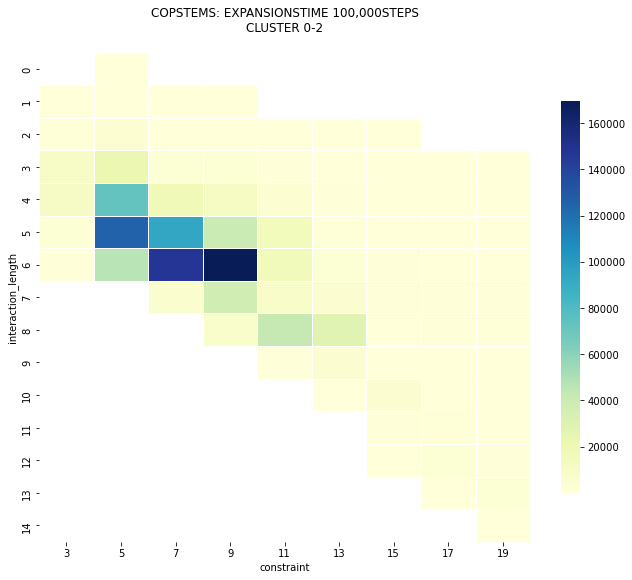

In [15]:
fheatmap = list()
constraint=list()

for run in range(exsteps):
    print(run,expansionsteps[run] )
    new1_df = df_100000_expand_long00[(df_100000_expand_long00["constraint"] == expansionsteps[run])]
    
    values1 = pd.DataFrame(new1_df.len_interaction.value_counts().sort_values().reset_index())
                         
    values1.columns = ['interaction_length', 'nr']
    values1['percent'] = (values1.nr /values1.nr.sum())*100
    values1['constraint'] = expansionsteps[run]
    print(values1)
    print("counted structures {}".format(values1['nr'].sum()))
    fheatmap.append(values1)

dfheatmap = pd.concat(fheatmap)

dfheat = pd.pivot_table(dfheatmap,index='interaction_length',columns='constraint',values='nr', aggfunc=np.sum)
print(dfheat)

fig, ax = plt.subplots(figsize=[11,9])
fig.patch.set_facecolor('white')

title = 'CopStems: Expansionstime 100,000steps\nCluster 0-2\n'.upper()
plt.title(title, loc='center')

sns.heatmap(dfheat, cmap="YlGnBu",linewidth=1, cbar_kws={"shrink":0.8})


plt.savefig('df_100000_expand_long00_all3clusters.png')
plt.show()

   interaction_countbp     nr    percent  constraint
0                    1    127   0.469848           3
1                    6    666   2.463929           3
2                    2   1943   7.188309           3
3                    5   3575  13.226045           3
4                    3  10090  37.328894           3
5                    4  10629  39.322974           3
counted structures 27030
   interaction_countbp      nr    percent  constraint
0                    0       1   0.000370           5
1                    1     150   0.055494           5
2                    2    4015   1.485387           5
3                    3   21913   8.106918           5
4                    6   46529  17.213836           5
5                    4   72498  26.821310           5
6                    5  125194  46.316685           5
counted structures 270300
   interaction_countbp      nr    percent  constraint
0                    1       5   0.001850           7
1                    2     624   0.230

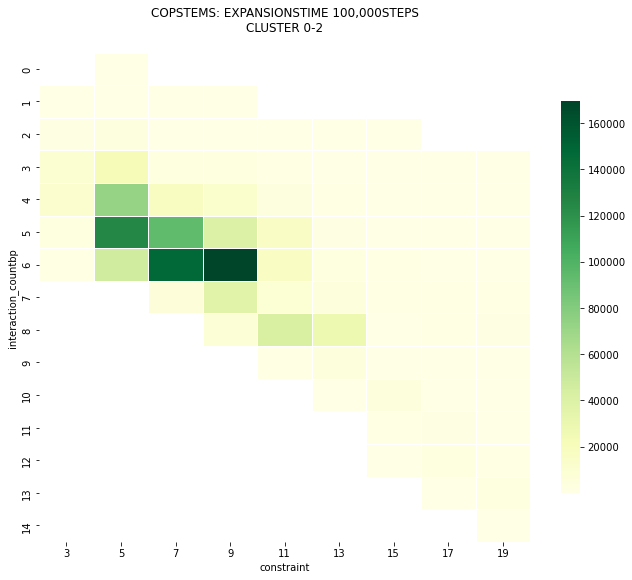

In [21]:
fheatmap = list()
constraint=list()

for run in range(exsteps):
    new1_df = df_100000_expand_long00[(df_100000_expand_long00["constraint"] == expansionsteps[run])]
    
    values1 = pd.DataFrame(new1_df.len_interaction.value_counts().sort_values().reset_index())
                         
    values1.columns = ['interaction_countbp', 'nr']
    values1['percent'] = (values1.nr /values1.nr.sum())*100
    values1['constraint'] = expansionsteps[run]
    print(values1)
    print("counted structures {}".format(values1['nr'].sum()))
    fheatmap.append(values1)

dfheatmap = pd.concat(fheatmap)

dfheat = pd.pivot_table(dfheatmap,index='interaction_countbp',columns='constraint',values='nr', aggfunc=np.sum)
print(dfheat)

fig, ax = plt.subplots(figsize=[11,9])
fig.patch.set_facecolor('white')

title = 'CopStems: Expansionstime 100,000steps\nCluster 0-2\n'.upper()
plt.title(title, loc='center')

sns.heatmap(dfheat, cmap="YlGn",linewidth=1, cbar_kws={"shrink":0.8})


plt.savefig('df_100000_expand_long00_all3clustersinclbulges.png')
plt.show()


cluster 0
counted structures 9010
counted structures 90100
counted structures 90100
counted structures 90100
counted structures 63070
counted structures 36040
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
constraint              3        5        7        9        11       13
interaction_length                                                     
1                      6.0     11.0      1.0      1.0      NaN      NaN
2                     98.0    444.0    176.0    109.0     68.0      9.0
3                   1168.0   3788.0   1284.0   1312.0    695.0    102.0
4                   4018.0  16543.0   7297.0   7971.0   4182.0    674.0
5                   3054.0  32679.0  25967.0  22912.0  14445.0   1218.0
6                    666.0  36635.0  54747.

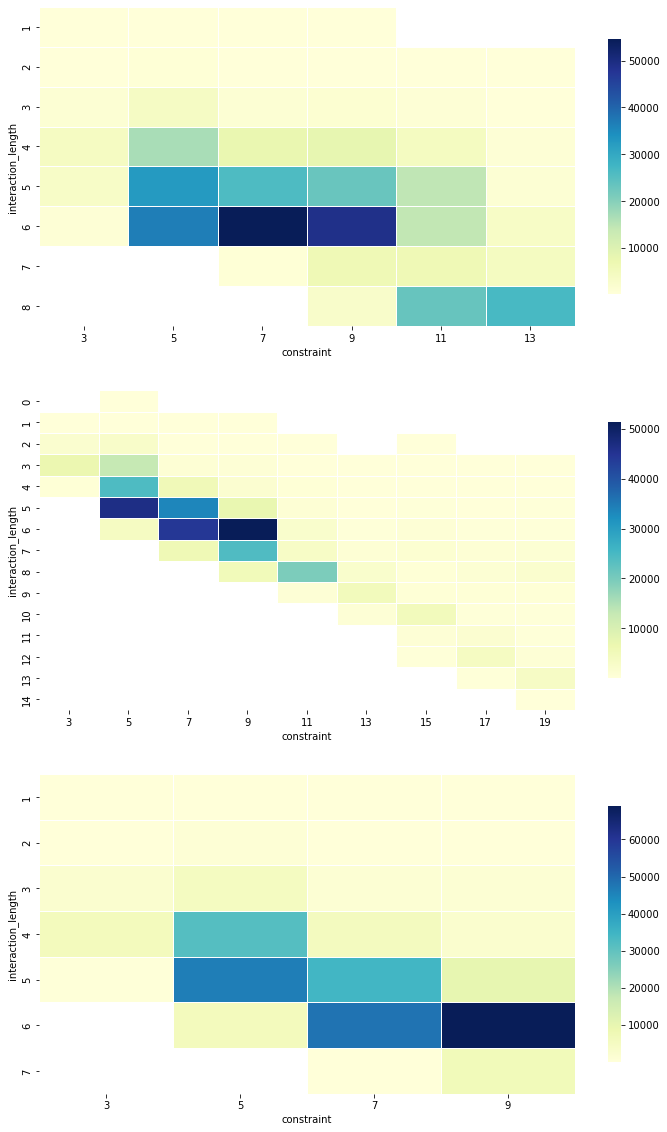

In [16]:
fheatmap = list()
constraint=list()

fig, ax = plt.subplots(nrows=3,figsize=[12,20])
fig.patch.set_facecolor('white')

for cl in range(clusters):
    print('cluster {}'.format(cl))
    currentconstraint = expansionsteps[cl]
    
    new1_df = df_100000_expand_long00[(df_100000_expand_long00["cluster"] == cl)]
      
    for runs in range(exsteps):
        new2_df = new1_df[(new1_df["constraint"] == expansionsteps[runs])]
        values1 = pd.DataFrame(new2_df.len_interaction.value_counts().sort_values().reset_index())
        values1.columns = ['interaction_length', 'nr']
        values1['percent'] = (values1.nr /values1.nr.sum())*100
        values1['constraint'] = expansionsteps[runs] 
        print("counted structures {}".format(values1['nr'].sum()))
        fheatmap.append(values1)
      
    dfheatmap = pd.concat(fheatmap)

    dfheatabs = pd.pivot_table(dfheatmap,index='interaction_length',columns='constraint',values='nr', aggfunc=np.sum)
    print(dfheatabs)

    axname = str('ax'+str(cl+1))
    axname = sns.heatmap(dfheatabs, cmap="YlGnBu",linewidth=1, cbar_kws={"shrink":0.8}, ax=ax[cl])

    fheatmap.clear()
    
plt.savefig('df_100000_expand_long00_allclustersseperat.png')
plt.show()

In [17]:
controllist100000.sort(key=lambda k: (k[2], k[3], k[4], k[5]))
dotfile = list()
dotfile.append("digraph dotfile {")
dotfile.append("rankdir=LR")
count = 0

for line in controllist100000: 

    if count == 0:
        start="ErnwinStart"     
        c,e,r,s = line[2],line[3],line[4],line[5]
        cluster = "CLUSTER_"+str(c)
        expansion = "c_"+str(c)+"RELAX_"+str(e)
        run = "c_"+str(c)+"e_"+str(e)+"RUN_"+str(r)
        seed = "c_"+str(c)+"e_"+str(e)+"r_"+str(r)+"seed1to10"
        dotfile.append(cluster+" [style=diagonals]")
        dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
        dotfile.append(start+" -> "+cluster)
        dotfile.append(cluster+" -> "+expansion)
        dotfile.append(expansion+" -> "+run)
        dotfile.append(run+" -> "+seed)
        count += 1

    else:
        if line[2] != c:
            c = line[2]
            cluster = "CLUSTER_"+str(c)
            dotfile.append(cluster+" [style=diagonals]")
            dotfile.append(start+" -> "+cluster)
          
        e = line[3]

        if line[4] != r: #because several seed per run

            if (e == 0):
                
                expansion = "c_"+str(c)+"RELAX_"+str(e)
                if (cluster+" -> "+expansion not in dotfile):
                    dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
                    dotfile.append(cluster+" -> "+expansion)
                
            else:
                expansion = "c_"+str(c)+"EXPANSION_"+str(e)+"run_"+str(r)
                seed = "c_"+str(c)+"e_"+str(e-1)+"r_"+str(line[4])+"seed1to10"
                if (seed+" -> "+expansion not in dotfile):
                    dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
                    dotfile.append(seed+" -> "+expansion)
                
        if line[4] != r:
            r = line[4]
            run = "c_"+str(c)+"e_"+str(e)+"RUN_"+str(r)
            seed = "c_"+str(c)+"e_"+str(e)+"r_"+str(r)+"seed1to10"
            dotfile.append(expansion+" -> "+run)
            
            dotfile.append(run+" -> "+seed)
    
dotfile.append("}")  

with open('dotfile'+stepsize1+'.dot', 'w') as f:
    for item in dotfile:
        f.write("%s\n" % item)


In [18]:
# 1 Mio Steps

In [ ]:
filename = list()
fclust=list()
stepsize1="1Mio"
stepsize2="expand_long06"
stepsize3="expand_long03"
subplotsname= list()
controllist1Mio=list()
seed=0
runs=0
nr=0

for runs in range(exsteps): # could be also lower/higher - if for one is no expansion possible
    run= str(runs)
    
    for cluster in range(clusters): #collect for each expansion step/cluster
        cl=str(cluster)

        dfname1_sum=str("dfcluster"+cl+"round"+run+"sum") 

        subplotsname.append(dfname1_sum)
        
        if runs == 0:
            for nr in range(10): #10 different pdbs as starting points      
                n=str(nr+1)
                filename1=str(stepsize1+"/cluster"+cl+"/"+run+"/"+n+"/CopStemsc"+cl+"_"+stepsize3+"_"+run+"_"+n+".csv")
                dfname1= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,103)])
                dfname1['constraint'] = int(expansionsteps[runs])
                dfname1['expansionstep'] = int(runs)
                dfname1['run'] = int(nr+1)
                dfname1['cluster'] = int(cluster)
                dfname1['seed'] = int(nr+1)
                fclust.append(dfname1)
                controllist1Mio.append([filename1,int(expansionsteps[runs]),int(cluster),int(runs),int(nr+1),int(nr+1)])

        else:
            for nr in range(10): #10 different pdbs as starting points      
                n=str(nr+1)

                for seed in range (10): #10 different seeds per pdb
                    #each single file
                    seed= str(seed+1)
                    filename1=str(stepsize1+"/cluster"+cl+"/"+run+"/"+n+"/CopStemsc"+cl+"_"+stepsize2+"_"+run+"_"+seed+".csv")

                    try:
                        dfname1= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,103)])
                        dfname1['constraint'] = int(expansionsteps[runs])
                        dfname1['expansionstep'] = int(runs)
                        dfname1['run'] = int(nr+1)
                        dfname1['cluster'] = int(cluster)
                        dfname1['seed'] = seed
                        fclust.append(dfname1)
                        controllist1Mio.append([filename1,int(expansionsteps[runs]),int(cluster),int(runs),int(nr+1),seed])

                    except:
                        #print("Probably there were no further expansion possible - please check")
                        #print(filename1)
                        pass
                
'''
print("controllist")    
for item in controllist1Mio:
    print(item)    

print (len(fclust)) 
df_1Mio_expand_long00 = pd.concat(fclust) 
    
print(len(df_1Mio_expand_long00))
print(df_1Mio_expand_long00)
'''

0 3
   interaction_length     nr    percent  constraint
0                   1    127   0.469848           3
1                   6    666   2.463929           3
2                   2   1943   7.188309           3
3                   5   3575  13.226045           3
4                   3  10090  37.328894           3
5                   4  10629  39.322974           3
counted structures 27030
1 5
   interaction_length       nr    percent  constraint
0                   0        6   0.000202           5
1                   1      474   0.015958           5
2                   8     5117   0.172272           5
3                   2    10942   0.368380           5
4                   7    46814   1.576070           5
5                   3    84362   2.840184           5
6                   4   171918   5.787900           5
7                   5   673861  22.686631           5
8                   6  1976806  66.552402           5
counted structures 2970300
2 7
   interaction_length       nr  

    interaction_length     nr    percent  constraint
0                    3      3   0.000379          23
1                   23     53   0.006691          23
2                   24     68   0.008585          23
3                    4    150   0.018937          23
4                   22    187   0.023609          23
5                    5    798   0.100747          23
6                    6   4736   0.597919          23
7                   21   5431   0.685663          23
8                    7  10714   1.352641          23
9                    8  27066   3.417079          23
10                   9  39667   5.007954          23
11                  16  44975   5.678088          23
12                  15  47984   6.057974          23
13                  18  48950   6.179931          23
14                  20  52466   6.623826          23
15                  14  53184   6.714473          23
16                  17  59254   7.480810          23
17                  11  67311   8.498005      

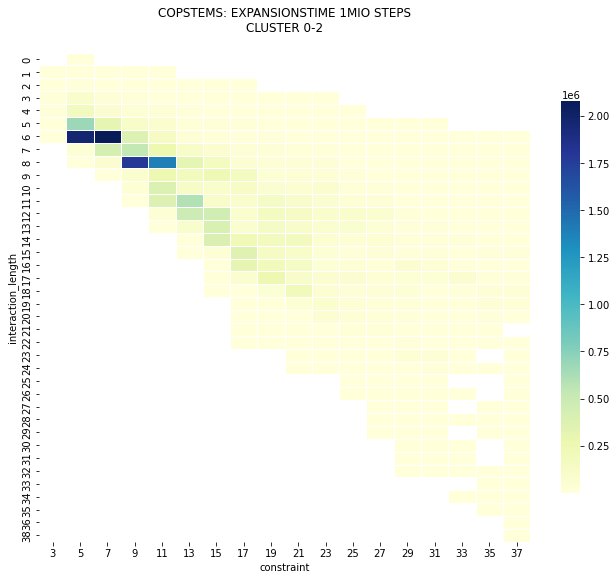

In [4]:
fheatmap = list()
constraint=list()

for run in range(exsteps):
    print(run,expansionsteps[run] )
    new1_df = df_1Mio_expand_long00[(df_1Mio_expand_long00["constraint"] == expansionsteps[run])]
    
    values1 = pd.DataFrame(new1_df.len_interaction.value_counts().sort_values().reset_index())
                         
    values1.columns = ['interaction_length', 'nr']
    values1['percent'] = (values1.nr /values1.nr.sum())*100
    values1['constraint'] = expansionsteps[run]
    print(values1)
    print("counted structures {}".format(values1['nr'].sum()))
    fheatmap.append(values1)

dfheatmap = pd.concat(fheatmap)

dfheat = pd.pivot_table(dfheatmap,index='interaction_length',columns='constraint',values='nr', aggfunc=np.sum)
print(dfheat)

fig, ax = plt.subplots(figsize=[11,9])
fig.patch.set_facecolor('white')

title = 'CopStems: Expansionstime 1Mio steps\nCluster 0-2\n'.upper()
plt.title(title, loc='center')

sns.heatmap(dfheat, cmap="YlGnBu",linewidth=1, cbar_kws={"shrink":0.8})


plt.savefig('df_1Mio_expand_long00_all3clusters.png')
plt.show()

cluster 0
counted structures 9010
counted structures 990100
counted structures 990100
counted structures 990100
counted structures 990100
counted structures 594060
counted structures 594060
counted structures 396040
counted structures 396040
counted structures 396040
counted structures 297030
counted structures 198020
counted structures 99010
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
constraint              3         5         7         9         11        13  \
interaction_length                                                             
1                      6.0      10.0       7.0       NaN       1.0       NaN   
2                     98.0    1329.0     624.0     243.0     163.0       2.0   
3                   1168.0   13272.0    9151.0    2814.0    2094.0     177.0   
4                   4018.0   36529.0   20315.0   16439.0   12959.0    1753.0   
5                   3054.0  

cluster 2
counted structures 9010
counted structures 990100
counted structures 990100
counted structures 990100
counted structures 990100
counted structures 594060
counted structures 594060
counted structures 495050
counted structures 495050
counted structures 495050
counted structures 297030
counted structures 198020
counted structures 198020
counted structures 198020
counted structures 99010
counted structures 0
counted structures 0
counted structures 0
counted structures 0
counted structures 0
constraint              3         5         7         9         11        13  \
interaction_length                                                             
1                     10.0      50.0       2.0       4.0       1.0       NaN   
2                    141.0    2794.0     820.0     278.0      80.0       NaN   
3                   2215.0   16490.0   10609.0    3799.0    1428.0     183.0   
4                   6123.0   73706.0   22044.0   15754.0   12033.0    1760.0   
5                 

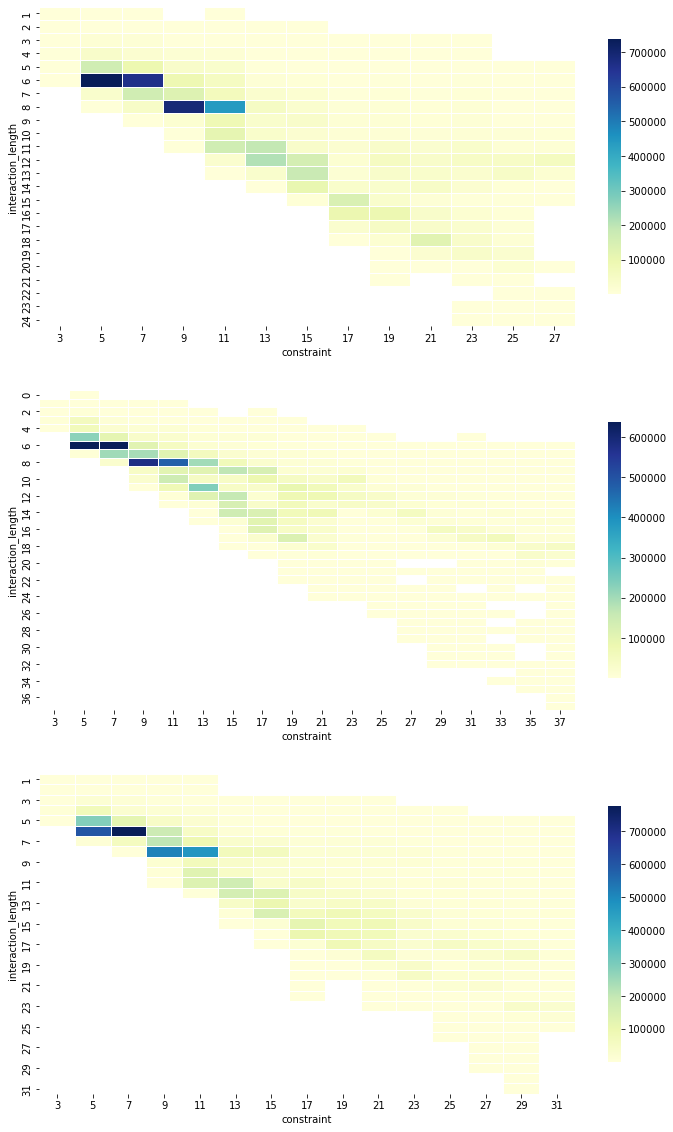

In [5]:
fheatmap = list()
constraint=list()

fig, ax = plt.subplots(nrows=3,figsize=[12,20])
fig.patch.set_facecolor('white')

for cl in range(clusters):
    print('cluster {}'.format(cl))
    currentconstraint = expansionsteps[cl]
    
    new1_df = df_1Mio_expand_long00[(df_1Mio_expand_long00["cluster"] == cl)]
      
    for runs in range(exsteps):
        new2_df = new1_df[(new1_df["constraint"] == expansionsteps[runs])]
        values1 = pd.DataFrame(new2_df.len_interaction.value_counts().sort_values().reset_index())
        values1.columns = ['interaction_length', 'nr']
        values1['percent'] = (values1.nr /values1.nr.sum())*100
        values1['constraint'] = expansionsteps[runs] 
        print("counted structures {}".format(values1['nr'].sum()))
        fheatmap.append(values1)

      
    dfheatmap = pd.concat(fheatmap)

    dfheatabs = pd.pivot_table(dfheatmap,index='interaction_length',columns='constraint',values='nr', aggfunc=np.sum)
    print(dfheatabs)

    axname = str('ax'+str(cl+1))
    axname = sns.heatmap(dfheatabs, cmap="YlGnBu",linewidth=1, cbar_kws={"shrink":0.8}, ax=ax[cl])

    fheatmap.clear()
    
plt.savefig('df_1Mio_expand_long00_allclustersseperat.png')
plt.show()

In [6]:
controllist1Mio.sort(key=lambda k: (k[2], k[3], k[4], k[5]))
dotfile = list()
dotfile.append("digraph dotfile {")
dotfile.append("rankdir=LR")
count = 0

for line in controllist1Mio: 

    if count == 0:
        start="ErnwinStart"     
        c,e,r,s = line[2],line[3],line[4],line[5]
        cluster = "CLUSTER_"+str(c)
        expansion = "c_"+str(c)+"RELAX_"+str(e)
        run = "c_"+str(c)+"e_"+str(e)+"RUN_"+str(r)
        seed = "c_"+str(c)+"e_"+str(e)+"r_"+str(r)+"seed1to10"
        dotfile.append(cluster+" [style=diagonals]")
        dotfile.append(start+" -> "+cluster)
        dotfile.append(cluster+" -> "+expansion)
        dotfile.append(expansion+" -> "+run)
        dotfile.append(run+" -> "+seed)
        count += 1

    else:
        if line[2] != c:
            c = line[2]
            cluster = "CLUSTER_"+str(c)
            dotfile.append(cluster+" [style=diagonals]")
            dotfile.append(start+" -> "+cluster)
          
        e = line[3]

        if line[4] != r: #because several seed per run

            if (e == 0):
                
                expansion = "c_"+str(c)+"RELAX_"+str(e)
                if (cluster+" -> "+expansion not in dotfile):
                    dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
                    dotfile.append(cluster+" -> "+expansion)
                
            else:
                expansion = "c_"+str(c)+"EXPANSION_"+str(e)+"run_"+str(r)
                seed = "c_"+str(c)+"e_"+str(e-1)+"r_"+str(line[4])+"seed1to10"
                if (seed+" -> "+expansion not in dotfile):
                    dotfile.append(expansion+" [style=filled,color=\"#ff000055\"]")
                    dotfile.append(seed+" -> "+expansion)
                
        if line[4] != r:
            r = line[4]
            run = "c_"+str(c)+"e_"+str(e)+"RUN_"+str(r)
            seed = "c_"+str(c)+"e_"+str(e)+"r_"+str(r)+"seed1to10"
            dotfile.append(expansion+" -> "+run)
            
            dotfile.append(run+" -> "+seed)
    
dotfile.append("}")  

with open('dotfile'+stepsize1+'.dot', 'w') as f:
    for item in dotfile:
        f.write("%s\n" % item)
        